# Taller 4

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import qexpy as q
from scipy import integrate
from scipy.integrate import odeint

## 1. Integrador de Beeman  1976

## 2. Integrador de Adams-Basforth

## 3. Integrador de Adams-Moulton

#### Demostración para 3 puntos:

In [7]:
h=sym.Symbol("h",real=True)
f_n=sym.Symbol("f_n",real=True)
fn_1=sym.Symbol("f_n-1",real=True)
fn1=sym.Symbol("f_n+1",real=True)
fn_2=sym.Symbol("f_n-2",real=True)
t=sym.Symbol("t",real=True)


In [5]:
def Lagrange(x,xi,j):
    
    prod = 1
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [6]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [9]:
fs3=np.array([f_n,fn_1,fn1])
ts3=np.array([-h,0,h])
pol=Interpolate(t,ts3,fs3)
pol

f_n*t*(-h + t)/(2*h**2) + f_n+1*t*(h + t)/(2*h**2) - f_n-1*(-h + t)*(h + t)/h**2

In [13]:
integ3=sym.integrate(pol,(t,0,h))
sym.simplify(integ3)

h*(-f_n + 5*f_n+1 + 8*f_n-1)/12

#### Demostración para 4 puntos

In [15]:
fs4=np.array([fn_2,fn_1,f_n,fn1])
ts4=np.array([-2*h,-h,0,h])
pol4=Interpolate(t,ts4,fs4)
pol4

-f_n*(-h + t)*(h + t)*(2*h + t)/(2*h**3) + f_n+1*t*(h + t)*(2*h + t)/(6*h**3) + f_n-1*t*(-h + t)*(2*h + t)/(2*h**3) - f_n-2*t*(-h + t)*(h + t)/(6*h**3)

In [16]:
integ4=sym.integrate(pol4,(t,0,h))
sym.simplify(integ4)

h*(19*f_n + 9*f_n+1 - 5*f_n-1 + f_n-2)/24

## 4. Integrador Simpléctico I 

El metodo de verlet dice que: 

$$
\begin{align*}
\vec{r_{n+1}}= \vec{r_n}+\vec{v_{n}h}+\frac{\vec{a_n}h^2}{2} \\
\vec{v_{n+1}}= \vec{v_n}+\frac{h}{2}(\vec{a_{n+1}}+\vec{a_n})
\end {align*}
$$


Ahora, a partir de estas ecuaciones hay que encontrar las derivadas parciales para poder formar el jacobiano. 


$$
\frac{\partial \vec{r_{n+1}}}{\vec{r_{n}}}= 1\\
\frac{\partial \vec{v_{n+1}}}{\vec{r_{n}}}= 0\\
\frac{\partial \vec{r_{n+1}}}{\vec{v_{n}}}= h\\
\frac{\partial \vec{v_{n+1}}}{\vec{v_{n}}}= 1\\
$$


Conociendo estas derivadas, es posible escribir del jacobiano de la siguiente forma:

$$
\begin{equation}
\begin{vmatrix}
 1& h\\
  0 & 1
\end{vmatrix}
\end{equation}
=1*1 -h*0 =1
$$

Por ende, al ser el jacobiano igual a 1 se puede concluir que el método es simpléctico.

## 6. Numerical Quantum Mechanics
### a)

### b)

In [17]:
h_=1
m=1
w=1

In [21]:
x_n=sym.Symbol("x_n",real=True)
E=sym.Symbol("E",real=True)

def V(x):
    return (1/2)*m*w**2*x**2
    

In [32]:
R_n=lambda x,E: 2*m*V(x)/h_**2- 2*m*E/h_**2

R_n(x_n,E)

-2*E + 1.0*x_n**2

### c)

In [33]:
N=1000
xs=np.linspace(-5,5,N)

### d)

Definida en el inciso b).

In [34]:
print("V(x)="+str(V(x_n)))

V(x)=0.5*x_n**2


### e)

In [61]:
def Numerov(x,V,E):
    h=x[1]-x[0]
    Rn=2*m*V(x)/h_**2- 2*m*E/h_**2
    
    psi=np.zeros(len(x))
    psi[0]=0
    psi[1]=1e-5
    
    for i in range (2,len(psi)):
        
        psi[i]=(-(1-h**2*Rn[i-2]/12)*psi[i-2] \
                +2*(1+5*h**2*Rn[i-1]/12)*psi[i-1])/((1-h**2*Rn[i]/12))
        
    return psi
        

### f)

In [62]:
dE=0.001

### g)

In [63]:
Es=np.array([0.5,1.5,2.5,3.5,4.5,5.5])

### h)


Text(0, 0.5, '$\\psi(x)$')

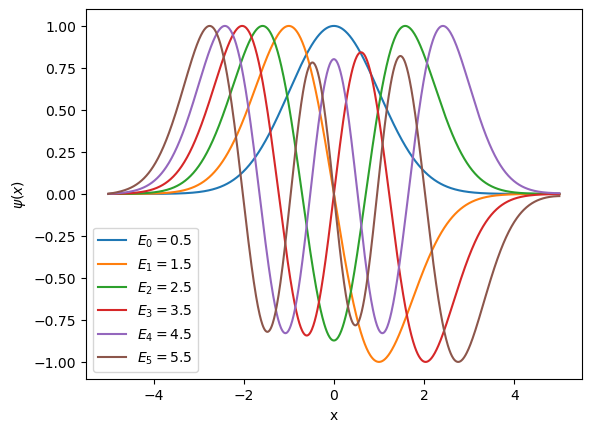

In [64]:
psis=np.zeros(len(Es))

for i in range(len(psis)):
    psi_=Numerov(xs,V,Es[i])/np.max(Numerov(xs,V,Es[i]))
    plt.plot(xs,psi_, label="$E_{%s}=%s$"%(i,Es[i]))
    plt.legend()

plt.xlabel("x")
plt.ylabel("$\psi(x)$")

                                    
                                    

### i)

In [65]:
def V2(x):
    return -10*np.exp(-x**2/20)

In [66]:
Es2=np.array([-9.51,-8.54,-7.62,-6.74,-5.89])
xs2=xs.copy()

Text(0, 0.5, '$\\psi(x)$')

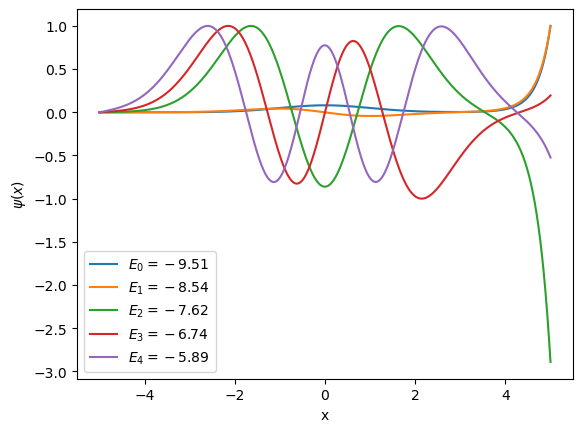

In [67]:
psis2=np.zeros(len(Es2))

for i in range(len(psis2)):
    psi_2=Numerov(xs2,V2,Es2[i])/np.max(Numerov(xs2,V2,Es2[i]))
    plt.plot(xs2,psi_2, label="$E_{%s}=%s$"%(i,Es2[i]))
    plt.legend()

plt.xlabel("x")
plt.ylabel("$\psi(x)$")

                                    
                         

### j)

In [68]:
def V3(x):
    return -4/(1+x**2)**2

In [74]:
Es3=np.array([-1.478,-0.163])

Text(0, 0.5, '$\\psi(x)$')

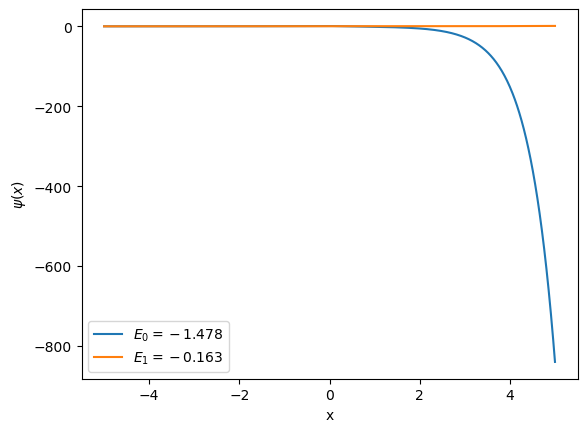

In [75]:
psis3=np.zeros(len(Es3))

for i in range(len(psis3)):
    psi_3=Numerov(xs2,V3,Es3[i])/np.max(Numerov(xs2,V3,Es3[i]))
    plt.plot(xs2,psi_3, label="$E_{%s}=%s$"%(i,Es3[i]))
    plt.legend()

plt.xlabel("x")
plt.ylabel("$\psi(x)$")